In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Bio import SeqIO
import tqdm

import os
from multiprocessing import Process, Pool
import sys
sys.path.append('../src/')

from utils import release_mutations_from_two_seqs

In [2]:
PATH_TO_MULAL = '../data/mulal.fasta'
PATH_TO_MULAL_HEAD = '../data/mulal.head.fasta'
NSEQS = 1139387

## 24 threads and 40 gb

In [3]:
%%time

reader = SeqIO.parse(PATH_TO_MULAL_HEAD, 'fasta')
ref = next(reader)


def get_nums(rec):
    seq1, seq2 = str(ref.seq), str(rec.seq)
    mutations = release_mutations_from_two_seqs(seq1, seq2)
    mut_num = len(mutations)
    indel_num = len([x for x in mutations if x[2] == '-'])
    return mut_num, indel_num


threads = 24
with Pool(threads) as p:
    nums = p.map(get_nums, reader)

CPU times: user 311 ms, sys: 124 ms, total: 435 ms
Wall time: 948 ms


In [4]:
len(nums)

1139387

In [5]:
nums_pruned = [x for x in nums if x[0] < 90]
print(len(nums_pruned))

mut_distro = [x[0] for x in nums_pruned]
indel_distro = [x[1] for x in nums_pruned]

1128092


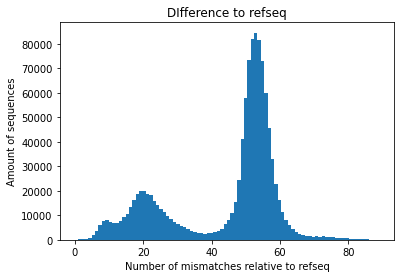

In [6]:
plt.hist(mut_distro, bins=90)
plt.title("DIfference to refseq")
plt.xlabel("Number of mismatches relative to refseq")
plt.ylabel("Amount of sequences")
plt.savefig("../figures/diff_to_refseq.png")
plt.show()

### deletions

```
$ for n in 3 4 5 6 7 8 9; do echo $n; egrep "[ATGC]\-{$n}[ATGC]" -c data/mulal.fasta; done
3
360108
4
6794
5
2020
6
768892
7
1942
8
1371
9
413388
```
`egrep "[ATGC]\-{10,}[ATGC]" -c data/mulal.fasta` - 26459



####  9nt deletion and 6nt deletion are spread

In [5]:
51_418.92 / 2

25709.46

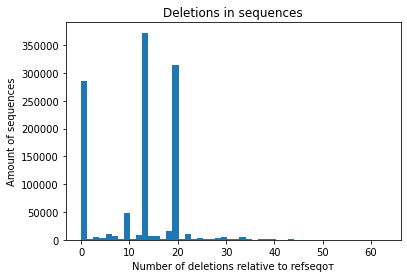

In [8]:
plt.hist(indel_distro, bins=50)
plt.title("Deletions in sequences")
plt.xlabel("Number of deletions relative to refseqот")
plt.ylabel("Amount of sequences")
plt.savefig("../figures/dels_in_seqs.png")
plt.show()

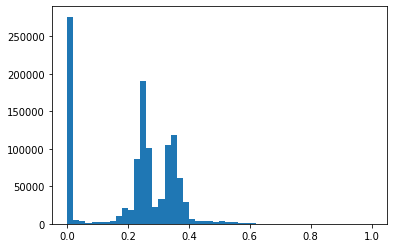

In [24]:
del_share = [y / x for x, y in nums_pruned if x > 0]
plt.hist(del_share, bins=50)
plt.show()

### 3rd peak formed by deletions

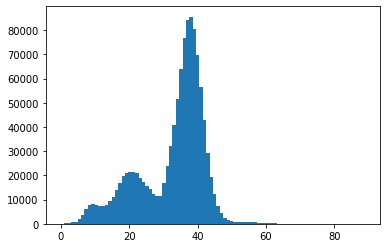

In [27]:
del_share = [x - y for x, y in nums_pruned]
plt.hist(del_share, bins=90)
plt.show()

In [33]:
1139387 * .4

455754.80000000005

In [16]:
import os
from multiprocessing import Process, Pool


def doubler(number):
    """
    Функция умножитель на два
    """
    result = number * 2
    proc = os.getpid()
    print('{0} doubled to {1} by process id: {2}'.format(
        number, result, proc))
 
 
if __name__ == '__main__':
    numbers = [5, 10, 15, 20, 25]
    procs = []
    
    for index, number in enumerate(numbers):
        proc = Process(target=doubler, args=(number,))
        procs.append(proc)
        proc.start()
    
    for proc in procs:
        proc.join()

5 doubled to 10 by process id: 9241210 doubled to 20 by process id: 92413

15 doubled to 30 by process id: 92419
20 doubled to 40 by process id: 92425
25 doubled to 50 by process id: 92430


In [17]:
def f(x):
    return x*x

if __name__ == '__main__':
    with Pool(5) as p:
        print(p.map(f, [1, 2, 3]))

[1, 4, 9]
